In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_pickle('cleaned_df')

**“What factors influence Airbnb prices in NYC?”**

In [3]:
corr = df.drop(['host_id','id',], axis=1).corr(numeric_only=True)['price']
corr

#shows that 'price' have no meaningful correlation with other numeric factors

latitude                          0.033954
longitude                        -0.149993
price                             1.000000
minimum_nights                    0.042809
number_of_reviews                -0.047964
reviews_per_month                -0.030608
calculated_host_listings_count    0.057469
availability_365                  0.081778
days_since_last_review            0.016811
superhost                         0.050815
Name: price, dtype: float64

# counting the numbers of listings in each neighbourhood

In [4]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21656
Brooklyn         20100
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

# Avg price in each neighbourhood

In [5]:
df.groupby('neighbourhood_group')['price'].mean().round(2).sort_values(ascending=False)

neighbourhood_group
Manhattan        196.88
Brooklyn         124.39
Staten Island    114.81
Queens            99.52
Bronx             87.46
Name: price, dtype: float64

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,has_reviews,superhost
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,262.0,has reviews,False
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,48.0,has reviews,False
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,NaN,No reviews,False
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,3.0,has reviews,False
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,231.0,has reviews,False


In [9]:
df.drop(['host_id','id','has_reviews'], axis=1).corr(numeric_only=True)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,superhost
latitude,1.000000,0.084721,0.033954,0.025829,-0.015338,-0.010142,0.019536,-0.011018,0.021828,0.055023
longitude,0.084721,1.000000,-0.149993,-0.062888,0.059108,0.145948,-0.114717,0.082756,-0.105687,-0.107184
price,0.033954,-0.149993,1.000000,0.042809,-0.047964,-0.030608,0.057469,0.081778,0.016811,0.050815
minimum_nights,0.025829,-0.062888,0.042809,1.000000,-0.081605,-0.121702,0.131324,0.145968,0.052803,0.188364
number_of_reviews,-0.015338,0.059108,-0.047964,-0.081605,1.000000,0.549868,-0.072397,0.172023,-0.283000,-0.094654
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,-0.441489,-0.070436
calculated_host_listings_count,0.019536,-0.114717,0.057469,0.131324,-0.072397,-0.009421,1.000000,0.225723,-0.050702,0.761565
availability_365,-0.011018,0.082756,0.081778,0.145968,0.172023,0.185791,0.225723,1.000000,-0.319512,0.261492
days_since_last_review,0.021828,-0.105687,0.016811,0.052803,-0.283000,-0.441489,-0.050702,-0.319512,1.000000,-0.019869
superhost,0.055023,-0.107184,0.050815,0.188364,-0.094654,-0.070436,0.761565,0.261492,-0.019869,1.000000


In [10]:
df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().nlargest(5)

neighbourhood_group  neighbourhood 
Staten Island        Fort Wadsworth    800.000000
                     Woodrow           700.000000
Manhattan            Tribeca           490.638418
Brooklyn             Sea Gate          487.857143
Bronx                Riverdale         442.090909
Name: price, dtype: float64

# Top 2 most expensive neighbours of each group

In [11]:
dfs = []
for i in df['neighbourhood_group'].unique():
    gr = df[df['neighbourhood_group'] ==i].groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().nlargest(2).reset_index()
    dfs.append(gr)

dfs
result_dfs = pd.concat(dfs, ignore_index=True)

In [12]:
result_dfs

,neighbourhood_group,neighbourhood,price
0,Brooklyn,Sea Gate,487.857143
1,Brooklyn,Cobble Hill,211.929293
2,Manhattan,Tribeca,490.638418
3,Manhattan,Battery Park City,367.086957
4,Queens,Neponsit,274.666667
5,Queens,Breezy Point,213.333333
6,Staten Island,Fort Wadsworth,800.000000
7,Staten Island,Woodrow,700.000000
8,Bronx,Riverdale,442.090909
9,Bronx,City Island,173.000000


In [13]:
df[df['neighbourhood_group'] =='Staten Island'].groupby('neighbourhood')['price'].mean().nlargest(4)

neighbourhood
Fort Wadsworth    800.0
Woodrow           700.0
Prince's Bay      409.5
Randall Manor     336.0
Name: price, dtype: float64

In [14]:
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.783367
Private room        89.784847
Shared room         70.075928
Name: price, dtype: float64

In [15]:
df.drop('id', axis=1).columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'days_since_last_review', 'has_reviews', 'superhost'],
      dtype='object')

# Avg availability for each room type

In [16]:
df.groupby('room_type')['availability_365'].mean().reset_index()

,room_type,availability_365
0,Entire home/apt,111.914866
1,Private room,111.238810
2,Shared room,161.825712


<Axes: xlabel='room_type', ylabel='availability_365'>

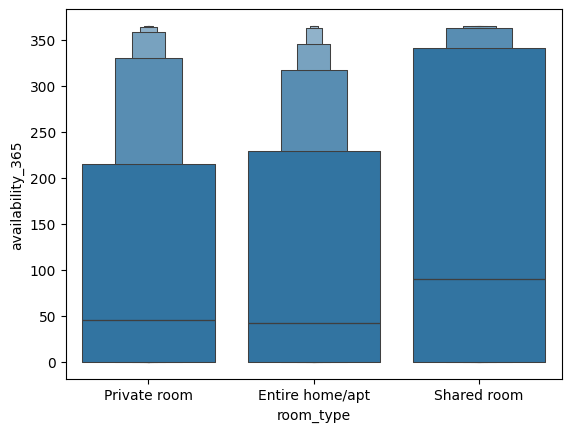

In [17]:
sns.boxenplot(data=df[['room_type', 'availability_365']], x='room_type',y='availability_365')


**shared rooms has  higher availability _days, where as entire house and private room have  lower availability**

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'days_since_last_review', 'has_reviews',
       'superhost'],
      dtype='object')

In [19]:
df['calculated_host_listings_count'].corr(df['price'])   # 0.057, almost no correlation between the two

np.float64(0.05746935725405968)

In [20]:
df['calculated_host_listings_count'].describe()

count    48885.000000
mean         7.145137
std         32.955786
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

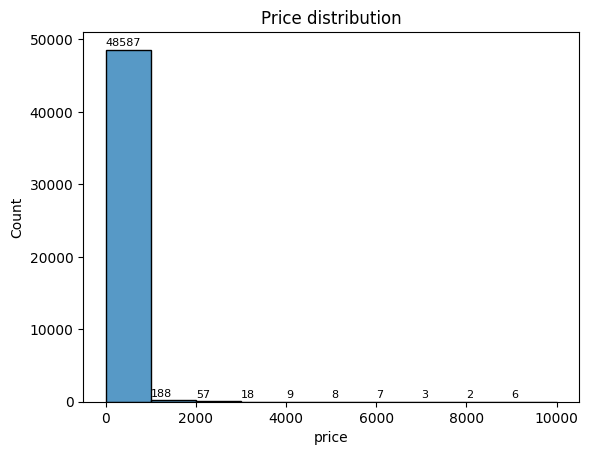

In [21]:
ax = sns.histplot(df['price'], bins=10)
for i in ax.patches:
    # print(i.get_height())
    plt.text(i.xy[0], i.get_height()+500, i.get_height(), fontdict={'fontsize':8} , ha='left')
    plt.title("Price distribution")

# almost all the properties have price under 1000, only few listings share expensive prices

In [22]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'days_since_last_review', 'has_reviews',
       'superhost'],
      dtype='object')

<Axes: xlabel='neighbourhood_group', ylabel='calculated_host_listings_count'>

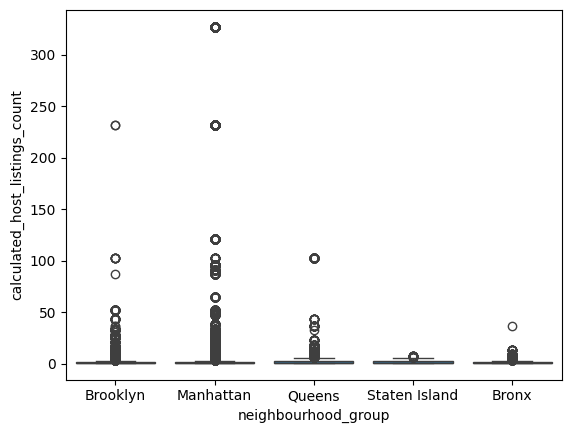

In [23]:
sns.boxplot(data=df, x='neighbourhood_group', y='calculated_host_listings_count')

**Low prices led to more bookings which in turns result into more reviews**

<Axes: xlabel='number_of_reviews', ylabel='price'>

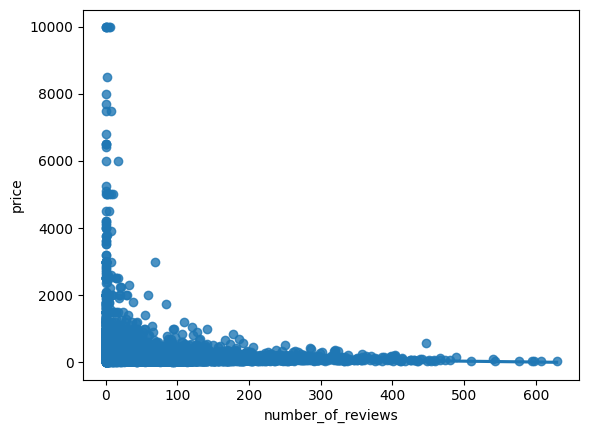

In [24]:
sns.regplot(data=df, x='number_of_reviews', y='price')      

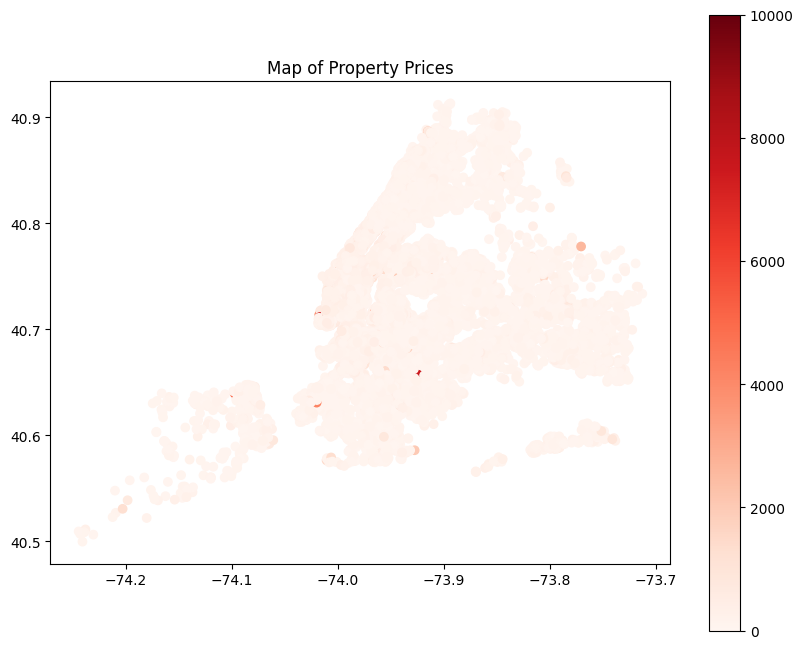

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Suppose df has 'latitude', 'longitude', and 'price'
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

gdf.plot(column='price', cmap='Reds', legend=True, figsize=(10, 8))
plt.title("Map of Property Prices")
plt.show()

In [26]:
high_price_threshold = df['price'].quantile(0.9)
high_price_df = df[df['price'] > 1000]


high_price_threshold

np.float64(269.0)

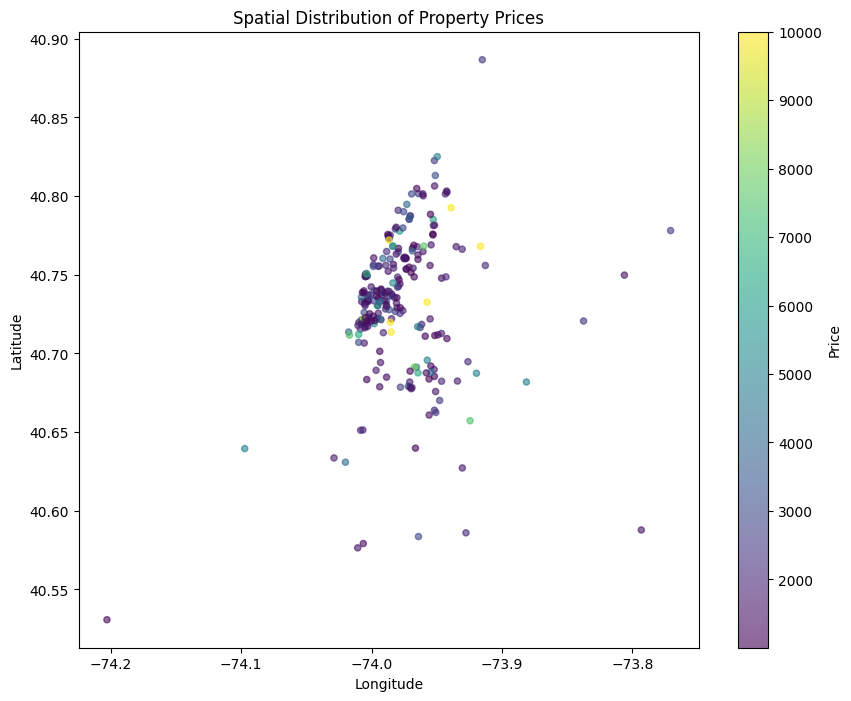

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(high_price_df['longitude'], high_price_df['latitude'], 
            c=high_price_df['price'], s=20, alpha=0.6)
plt.colorbar(label='Price')
plt.title('Spatial Distribution of Property Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# **Using Plotly for locating expensive listings on a map**

In [28]:
import plotly.express as px

# Assume df has: latitude, longitude, price, number_of_reviews

# ---- Option 1: Highlight expensive listings ----
fig_price = px.scatter_mapbox(
    high_price_df,
    lat="latitude",
    lon="longitude",
    color="price",               # Color scale shows price
    size="price",                # Bigger bubbles = higher prices
    color_continuous_scale="Turbo",  # Or "Viridis", "Plasma"
    size_max=15,
    zoom=10,
    mapbox_style="carto-positron",
    title="Map of Property Prices (Expensive Listing Hotspots)"
)
fig_price.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_15676\218539626.py:6: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig_price = px.scatter_mapbox(


In [29]:
df['price'].median()
#median is $106



np.float64(106.0)

In [30]:
df.groupby('neighbourhood_group')['price'].median()

neighbourhood_group
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64

**Manhattan listings are more expensive than the median price**

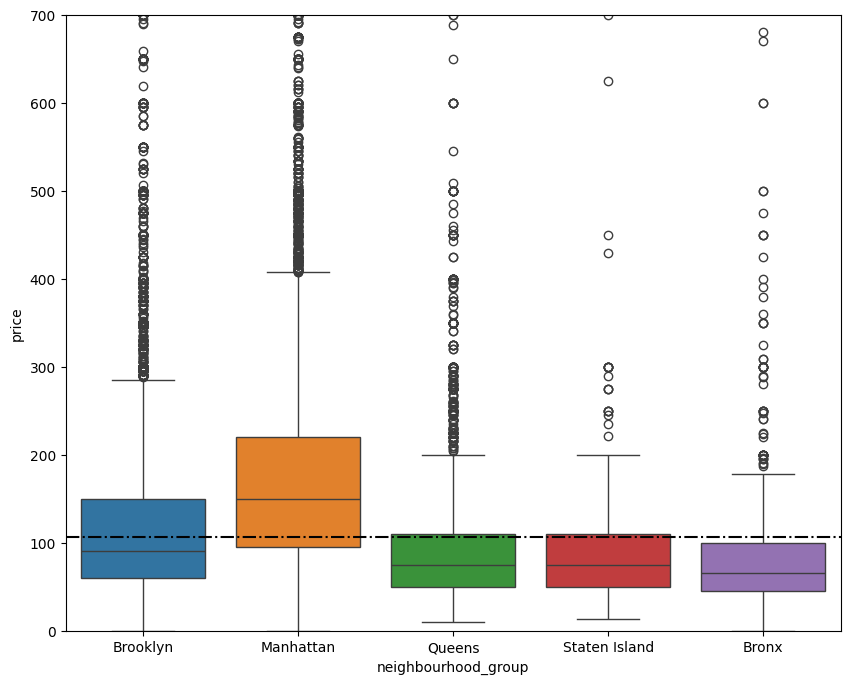

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='neighbourhood_group')
plt.ylim(0,700)
plt.axhline(y=df['price'].median(), linestyle="-.", color='black')

In [32]:
df.groupby('neighbourhood_group')['number_of_reviews'].sum()

neighbourhood_group
Bronx             28371
Brooklyn         486574
Manhattan        454569
Queens           156950
Staten Island     11541
Name: number_of_reviews, dtype: int64

**manhattan has the 2nd most reviews but the review per listing is the least, indicating that people are giving review lesser in the mahnattan listings**

In [33]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'days_since_last_review', 'has_reviews',
       'superhost'],
      dtype='object')